In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

samples=pd.read_csv("/content/drive/MyDrive/rocksamples.csv")

In [2]:
# :مسیر
# ۱- تماشای داده ها
# ۲- برخورد با فقدان داده یا داده تکراری
# ۳- نرمال سازی نوع داده
# ۴- استاندارد کردن داده ها
# ۵- یکسان سازی و تصحیح نام ستون ها
# ۶- تشخیص و برخورد با داده های پرت و اشتباه

In [3]:
# ۱- تماشای داده ها

samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [4]:
samples.head(5)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.8,88.36
1,10002,Apollo11,Soil,Unsieved,5629.0,93.73
2,10003,Apollo11,Basalt,Ilmenite,213.0,65.56
3,10004,Apollo11,Core,Unsieved,44.8,71.76
4,10005,Apollo11,Core,Unsieved,53.4,40.31


In [5]:
samples.tail()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
2224,79528,Apollo17,Breccia,Regolith,2.38,100.0
2225,79529,Apollo17,Breccia,Regolith,1.84,100.0
2226,79535,Apollo17,Breccia,Regolith,1.69,100.0
2227,79536,Apollo17,Breccia,Regolith,1.66,100.0
2228,79537,Apollo17,Breccia,Regolith,1.05,100.0


In [6]:
samples.describe()

,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


<Axes: xlabel='Mission', ylabel='Pristine (%)'>

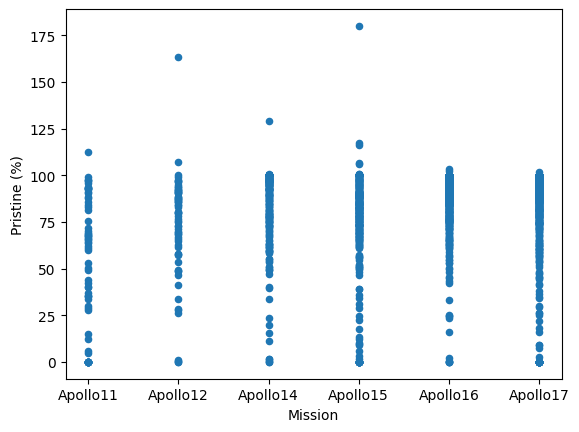

In [7]:
samples.plot(kind='scatter',x='Mission',y='Pristine (%)')

In [8]:
# ۲- برخورد با فقدان داده ها یا داده ی تکراری

samples_2=samples.copy()

In [9]:
# داده ی تهی

median= samples_2['Weight (g)'].median()
samples_2['Weight (g)'].fillna(median,inplace=True)

samples_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


/tmp/ipython-input-3794426200.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  samples_2['Weight (g)'].fillna(median,inplace=True)


In [10]:
samples_2.dropna(inplace=True)
samples_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


In [11]:
# داده ی تکراری

samples_2.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2224,False
2225,False
2226,False
2227,False


In [12]:
samples_2.drop_duplicates(inplace=True)

samples_2.info()

# با توجه به خروجی تابع اینفو پس داده ی تکراری نداشتیم

<class 'pandas.core.frame.DataFrame'>
Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


In [13]:
# نرمال سازی نوع داده و استاندارد سازی داده ها
# تبدیل گرم به کیلوگرم
samples_2['Weight (g)']=samples_2['Weight (g)'].apply(lambda x: x* 0.001)

samples_2.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


In [14]:
# تغییر نام ستون از گرم به کیلوگرم

samples_2.rename(columns={'Weight (g)':'Weight (Kg)'},inplace=True)

samples_2.head(0)

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%)


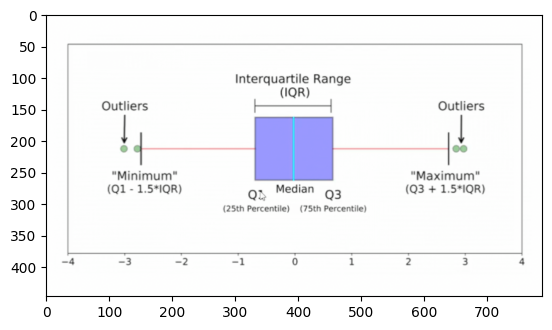

In [15]:
# iqr پاک کردن داده های اشتباه با روش

iqr_method=cv2.imread('/content/drive/MyDrive/iqr.png')
plt.imshow(iqr_method)


In [16]:
# پاک کردن داده های وزنی اضافه

# q_25=samples_2['Weight (Kg)'].quantile(0.25)
# q_75=samples_2['Weight (Kg)'].quantile(0.75)
# iqr=q_75-q_25     #(q3 - q1)
# print(iqr)

# for i in samples_2.index:
#   if samples_2.loc[i,'Weight (Kg)'] > (q_75+iqr*1.5):
#     samples_2.drop(i,inplace=True)


# (pristine) پاک کردن داده های اضافه و اشتباه مربوط به درصد تازگی

for i in samples_2.index:
  if samples_2.loc[i,'Pristine (%)'] > 100:
    samples_2.drop(i,inplace=True)


print(samples_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2208 non-null   int64  
 1   Mission       2208 non-null   object 
 2   Type          2208 non-null   object 
 3   Subtype       2208 non-null   object 
 4   Weight (Kg)   2208 non-null   float64
 5   Pristine (%)  2208 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 185.3+ KB
None
